### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import operator
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import inaugural
from wordcloud import WordCloud, STOPWORDS 

### Function to calculate percentages of words and print frequencies and percentages

In [2]:
def perc(d):
    perc = {}
    for key, value in d.items():
        newvalue = round(value/len(preprocessed_text)*100, 2)
        perc[key]= newvalue
        print(str(key)+','+str(value)+','+str(newvalue)+','+' ,')
    #print(perc)

### Removing the numbers and splitting the data into words(containing only letters)

In [3]:
df = pd.read_csv('rna_mapping_R.csv')
#print(df.head(5))
x = df['GSM_Title'].values
print(len(x))

#print(x[:10], sep = ',')

pattern_to_find1 = "[^a-zA-Z0-9 ]"
pattern_to_repl1 = " "
pattern_to_find2 = "[^a-zA-Z ]";
pattern_to_repl2 = ""

preprocessed_text = []
total_string_labels = ''
for sample in x:
    try:
        pre_txt = re.sub(pattern_to_find1, pattern_to_repl1, sample)
        pre_txt = re.sub(pattern_to_find2, pattern_to_repl2, pre_txt).lower()
        total_string_labels+=pre_txt
    #     print(pre_txt.strip())
        preprocessed_text.extend(pre_txt.strip().split())
    except:
        continue    
#preprocessed_text = [x for x in preprocessed_text if len(x)!=1]
print(len(preprocessed_text))
print('')

927758
3043427



### Calculating frequencies of words in the list

In [4]:
# print(total_string_labels)

counts = Counter(preprocessed_text)
print(len(counts))
#print(counts)
print('')

45792



### Keeping only words with freq > 100 and splitting it into 1, 2, 3, >3 lettered labels 

In [5]:
# 
d_100 = dict((k, v) for k, v in counts.items() if v >= 100)
sorted_d_100 = dict( sorted(d_100.items(), key=operator.itemgetter(1),reverse=True))
#perc_d_100 = dict((k, (v/len(preprocessed_text)*100) ) for k, v in sorted_d_100)
print(len(sorted_d_100))
#print(sorted_d_100)    
#perc(sorted_d_100)

sorted_d_100_single = dict((k,v) for k, v in sorted_d_100.items() if len(k) == 1)
print('1 letter ', len(sorted_d_100_single))
#print(sorted_d_100_single)
#perc(sorted_d_100_single)

sorted_d_100_double = dict((k,v) for k, v in sorted_d_100.items() if len(k) == 2)
print('2 letters ', len(sorted_d_100_double))
#print(sorted_d_100_double)
#perc(sorted_d_100_double)

sorted_d_100_triple = dict((k,v) for k, v in sorted_d_100.items() if len(k) == 3)
print('3 letters ', len(sorted_d_100_triple))
#print(sorted_d_100_triple)
#perc(sorted_d_100_triple)

sorted_d_100_more = dict((k,v) for k, v in sorted_d_100.items() if len(k) > 3)
print('more than 3 letters ', len(sorted_d_100_more))
#print(sorted_d_100_more)
#perc(sorted_d_100_more)

2288
1 letter  26
2 letters  375
3 letters  636
more than 3 letters  1251


### Keeping only words with freq > 300 and splitting it into 1, 2, 3, >3 lettered labels

In [6]:
print('')

d_300 = dict((k, v) for k, v in counts.items() if v >= 300)
sorted_d_300 = dict( sorted(d_300.items(), key=operator.itemgetter(1),reverse=True))
print(len(sorted_d_300))
#print(sorted_d_300)
#perc(sorted_d_300)

sorted_d_300_single = dict((k,v) for k, v in sorted_d_300.items() if len(k) == 1)
print('1 letter ', len(sorted_d_300_single))
#print(sorted_d_300_single)
#perc(sorted_d_300_single)

sorted_d_300_double = dict((k,v) for k, v in sorted_d_300.items() if len(k) == 2)
print('2 letters ', len(sorted_d_300_double))
#print(sorted_d_300_double)
#perc(sorted_d_300_double)

sorted_d_300_triple = dict((k,v) for k, v in sorted_d_300.items() if len(k) == 3)
print('3 letters ', len(sorted_d_300_triple))
#print(sorted_d_300_triple)
#perc(sorted_d_300_triple)

sorted_d_300_more = dict((k,v) for k, v in sorted_d_300.items() if len(k) > 3)
print('more than 3 letters ', len(sorted_d_300_more))
#print(sorted_d_300_more)
#perc(sorted_d_300_more)


1013
1 letter  26
2 letters  244
3 letters  253
more than 3 letters  490


### Summary

Total number of samples = 


Total number of words generated = 3043427


Total number of labels = 45792


Total number of labels with frequency > 100 = 2288 (Entire list alongwith percentages with appropriate segregation in 26000_rnaseq_rep(freq>100).csv)

1 letter labels = 26
2 letters labels = 375
3 letters  labels = 636
more than 3 letters labels = 1251


Total number of labels with frequency > 300 = 1013 (Entire list alongwith percentages with appropriate segregation in 26000_rnaseq_rep(freq>300).csv)

1 letter labels = 26
2 letters labels = 244
3 letters  253
more than 3 letters labels = 490


Observations about the data sets:<br />
1) There are some labels where numbers are important and others where they are not. This analysis is after removing numbers from the labels.<br />
2) Some labels contain words like pH7.4 and pH6.3 which before removing numbers are different and after, come under the same category. But actually they seem to have different and important context.
3) Same is true for labels having time, like 6weeks, 4weeks or 24hours, 12hours which when deprived of numbers are just weeks and hours.<br />
3) Some labels like 3415134 are such that numbers don't seem significant but then removing numbers is equivalent to removing the entire data point.<br />
4) Some labels are just single letters and numbers, e.g., A12 or B34, which when deprived of numbers or single letters, disappear completely. Will have to look into these.<br />

New observations:<br />
1)Some labels are non-strings<br />
2)Some are smaller numbers eg 2,3,4,5,...<br />
3)Some labels contain special characters like '[',']' of which importance is unknown<br /> 

#### Top 60 words

##### With 1 lettered labels

In [7]:
d_df = pd.DataFrame.from_dict(sorted_d_300, orient='index', columns=['Freq'])
d_df.head(60)

Freq
rep        104455
s           74304
seq         73037
cell        72510
c           68239
h           63483
p           59128
e           57914
d           50725
rna         46194
b           40189
a           39610
f           36473
single      34281
wt          33763
replicate   33415
r           32511
l           27923
t           27175
g           26918
sample      25213
of          20885
control     18425
x           17735
cd          17224
day         16171
m           15616
na          15246
n           14828
i           14108
in          13338
w           12679
comb        12584
rnaseq      12244
cells       11822
ko          11756
from        11700
mgh         11643
chip        10895
mrna        10105
cy           9799
mouse        9482
male         8646
hkme         8583
knockdown    8332
gfp          8196
input        7979
sc           7737
repa         7548
hnscc        7200
hr           7127
pos          7063
female       6801
v            6798
brain        6756
liver        6370
exon         6315
multi        6236
genes        6224
spar         6192

##### Without 1 lettered labels

In [8]:
sorted_d_300_w = dict((k, v) for k, v in sorted_d_300.items() if len(k)!=1)
d_df = pd.DataFrame.from_dict(sorted_d_300_w, orient='index', columns=['Freq'])
d_df.head(60)

Freq
rep        104455
seq         73037
cell        72510
rna         46194
single      34281
wt          33763
replicate   33415
sample      25213
of          20885
control     18425
cd          17224
day         16171
na          15246
in          13338
comb        12584
rnaseq      12244
cells       11822
ko          11756
from        11700
mgh         11643
chip        10895
mrna        10105
cy           9799
mouse        9482
male         8646
hkme         8583
knockdown    8332
gfp          8196
input        7979
sc           7737
repa         7548
hnscc        7200
hr           7127
pos          7063
female       6801
brain        6756
liver        6370
exon         6315
multi        6236
genes        6224
spar         6192
regions      6192
plate        6093
msc          5994
scrna        5929
with         5846
mscb         5781
ls           5701
trpl         5596
wg           5526
tumor        5374
ss           5373
il           5331
exp          5298
treated      5196
patient      4973
lung         4967
eb           4903
embryo       4811
dmso         4809

### Frequency Plots

#### Bar chart : 1 lettered labels

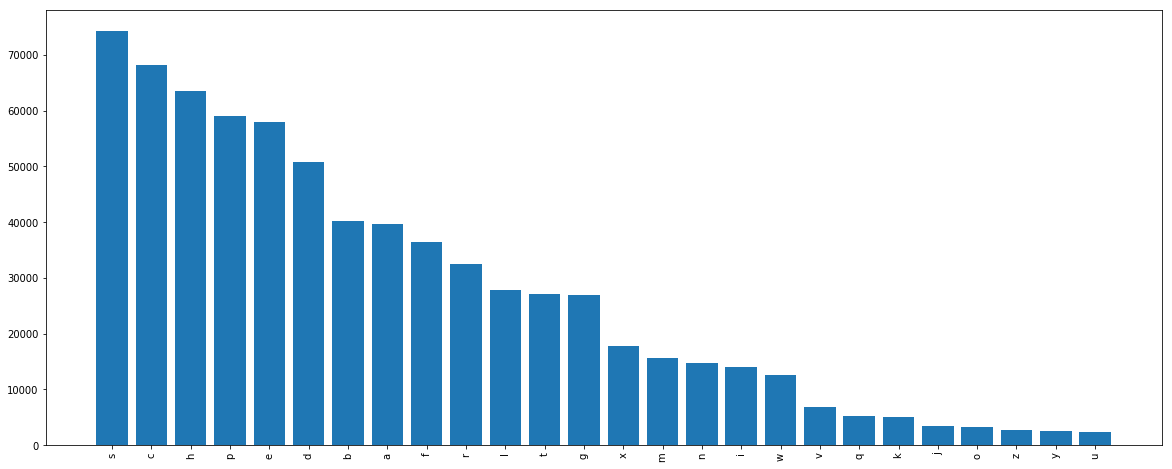

In [9]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation='vertical')
plt.bar(sorted_d_300_single.keys(), sorted_d_300_single.values())

plt.show()

#### Bar chart : 2 lettered labels(top 100)

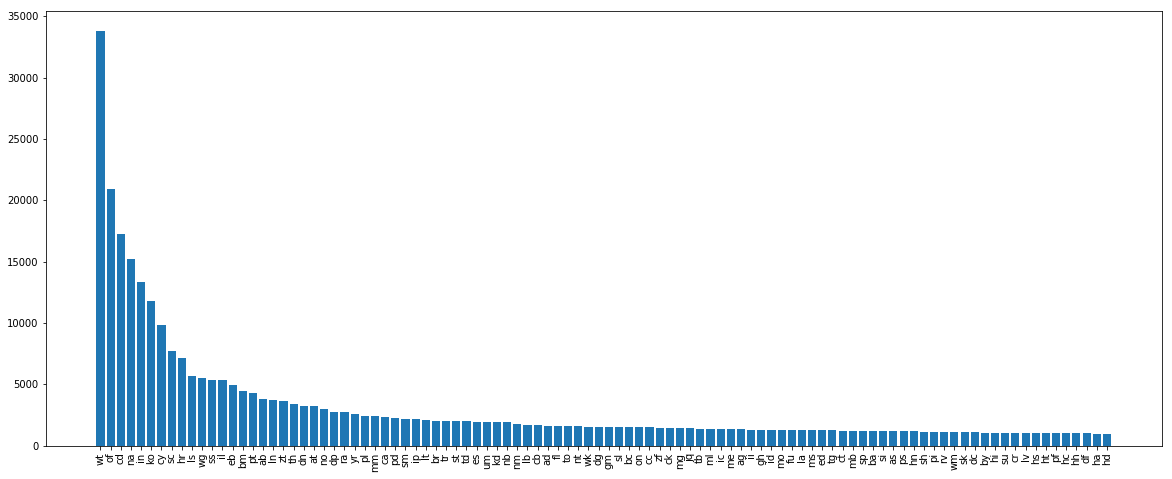

In [10]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation='vertical')
plt.bar(list(sorted_d_300_double.keys())[:100], list(sorted_d_300_double.values())[:100])

plt.show()

#### Bar chart : 3 lettered labels(top 100)

In [11]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation='vertical')
plt.bar(list(sorted_d_300_triple.keys())[:100], list(sorted_d_300_triple.values())[:100])

plt.show()

#### Bar chart : >3 lettered labels(top 100)

In [12]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation='vertical')
plt.bar(list(sorted_d_300_more.keys())[:100], list(sorted_d_300_more.values())[:100])

plt.show()

#### Histogram : Top 100 words by frequency (Bin size 5000)

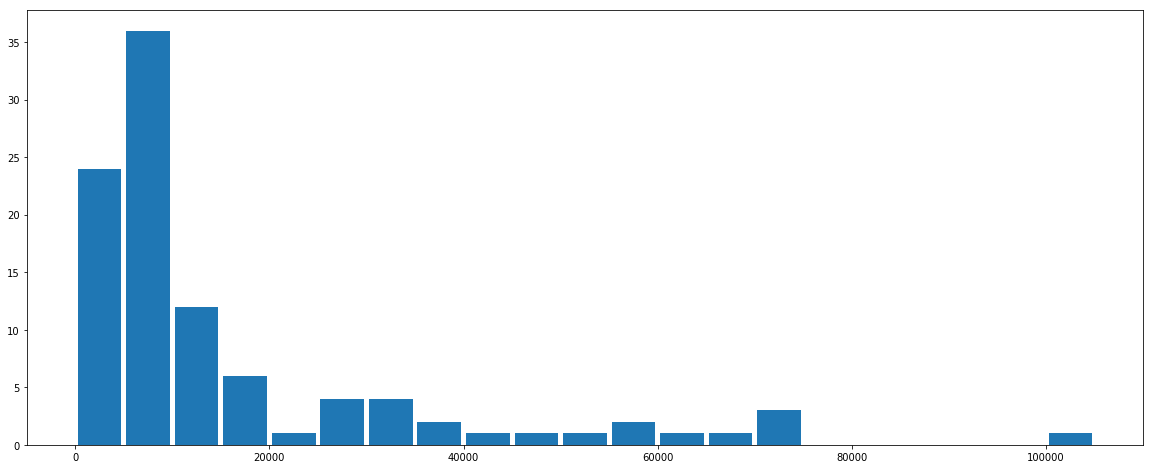

In [13]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
bins = [x*5000 for x in range(0,22)]
plt.hist(list(sorted_d_300.values())[:100], bins, rwidth=0.9)

plt.show()

#### Histogram : Top 100 words by frequency (Bin size 10000)

In [14]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
bins = [x*10000 for x in range(0,13)]
plt.hist(list(sorted_d_300.values())[:100], bins, rwidth=0.9)

plt.show()

In [15]:
%matplotlib inline

stopwords = set(STOPWORDS) 

d_300 = dict((k, v) for k, v in d_300.items() if len(k)!=1)

# wordcloud = WordCloud().generate(total_string_labels) 
wordcloud =  WordCloud(width = 800, height = 800, 
                colormap="Oranges_r", max_words=1000,
                min_font_size = 10).generate_from_frequencies(d_300)
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

plt.show()